### Cardiac Arrhythmia Multy-Class Classification 

Analyze data and address missing data if there is any. 

Decide aboute a good evaluation strategy and justify choice. 

Find the best parameters for the following classification models: 
- KNN classifcation 
- Logistic Regression
- Linear Supprt Vector Machine
- Kerenilzed Support Vector Machine
- Decision Tree
- Random Forest 

Then use different bagging and boosting methods to boost the results

Next, use data reduction method  learned in class to reduce the size of data, compare the results

## 1. Data Import

In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("cardiac_arrhythmia.csv", header=None, na_values = '?')

## 2. Data Preprocessing

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [3]:
data.shape

(452, 280)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(121), int64(159)
memory usage: 988.8 KB


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


#### Missing value

In [6]:
miss_total = data.isnull().sum().sort_values(ascending=False)
miss_percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([miss_total, miss_percent], axis=1, keys=['Total', 'Percent'])
miss_data.head()

,Total,Percent
13,376,0.831858
11,22,0.048673
10,8,0.017699
14,1,0.002212
12,1,0.002212


In [7]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean',axis=1) 
data=pd.DataFrame(imputer.fit_transform(data)).drop(13, axis=1)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [9]:
column_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,14,278]
new_names = ["Age", "Sex", "Height", "Weight","QRS duration","P-R interval","Q-T interval","T interval","P interval","QRS","T","P","QRST","Heart rate","Class"]
old_names = data.columns[column_indices]
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [10]:
data.head()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,270,271,272,273,274,275,276,277,278,Class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [11]:
data[['T','P','QRST','Heart rate']].isnull().sum()

T             0
P             0
QRST          0
Heart rate    0
dtype: int64

In [12]:
data.describe()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,270,271,272,273,274,275,276,277,278,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


#### Evaluation strategy: Recall

In [13]:
data.groupby('Class').count().sort_values([278],ascending=False)

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,269,270,271,272,273,274,275,276,277,278
Class,,,,,,,,,,,,,,,,,,,,,
1.0,245,245,245,245,245,245,245,245,245,245,...,245,245,245,245,245,245,245,245,245,245
10.0,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
2.0,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
6.0,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
16.0,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
3.0,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
4.0,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
5.0,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
9.0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [14]:
#There is imbalanced classes, so delete the class with observations less than 5
# Choose Recall instead of accuracy as evaluation strategy, average = 'weighted'
data = data[(data.Class != 7) & (data.Class != 8) & (data.Class != 14) & (data.Class != 15)]

In [15]:
data.shape

(438, 279)

## 3. Model without PCA

#### Data Scaling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data.iloc[:, :-1]
y = data.iloc[:,-1]

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=10)
scaler=MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

#### 1. KNN Classification

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[5, 10, 20, 50]}
recall_score=make_scorer(recall_score, average = 'weighted')
score=make_scorer(recall_score, average = 'weighted')

grid_search = GridSearchCV(knn , param_grid, cv = 5,scoring=recall_score,return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(recall_score, average=weighted), verbose=0)

In [18]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0036,0.012401,0.591463,0.641110,5,{'n_neighbors': 5},1,0.542857,0.655039,0.573529,...,0.590909,0.637405,0.650794,0.611321,0.606557,0.647940,0.000490,0.001625,0.035909,0.016149
1,0.0032,0.011801,0.576220,0.585411,10,{'n_neighbors': 10},2,0.542857,0.589147,0.573529,...,0.575758,0.576336,0.587302,0.569811,0.606557,0.591760,0.000400,0.000400,0.020829,0.010889
2,0.0032,0.012201,0.560976,0.564846,20,{'n_neighbors': 20},3,0.528571,0.573643,0.544118,...,0.560606,0.561069,0.587302,0.558491,0.590164,0.561798,0.000400,0.000748,0.023971,0.005667
3,0.0040,0.013801,0.554878,0.554944,50,{'n_neighbors': 50},4,0.528571,0.562016,0.544118,...,0.545455,0.557252,0.571429,0.550943,0.590164,0.546816,0.000633,0.000400,0.021765,0.005384


In [19]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'n_neighbors': 5}
Best score 0.591


In [20]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)

print('KNN classifcation')
print('Train score: {0:0.3f}'.format(knn_clf.score(X_train, y_train)))
print('Test score: {0:0.3f}'.format(knn_clf.score(X_test, y_test)))

KNN classifcation
Train score: 0.643
Test score: 0.609


#### 2. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
param_grid = {'penalty':['l1', 'l2']}

grid_search = GridSearchCV(lreg, param_grid, cv = 5 ,scoring=recall_score, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(recall_score, average=weighted), verbose=0)

In [22]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.065404,0.011201,0.719512,0.775153,l1,{'penalty': 'l1'},1,0.700000,0.779070,0.676471,...,0.742424,0.770992,0.793651,0.762264,0.688525,0.786517,0.005239,0.020401,0.042488,0.008137
1,0.071204,0.001400,0.713415,0.825435,l2,{'penalty': 'l2'},2,0.714286,0.821705,0.661765,...,0.742424,0.828244,0.761905,0.815094,0.688525,0.835206,0.002482,0.000490,0.035908,0.006729


In [23]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'penalty': 'l1'}
Best score 0.720


In [24]:
lreg_clf = LogisticRegression(penalty = 'l1')
lreg_clf.fit(X_train,y_train)

print('Logistic Regression')
print('Train score: {0:0.3f}'.format(lreg_clf.score(X_train, y_train)))
print('Test score: {0:0.3f}'.format(lreg_clf.score(X_test, y_test)))

Logistic Regression
Train score: 0.780
Test score: 0.727


#### 3. Linear Supprt Vector Machine

In [25]:
from sklearn.svm import LinearSVC

lin = LinearSVC()

param_grid = {'C':[0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(lin, param_grid, cv = 5, scoring=recall_score, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(recall_score, average=weighted), verbose=0)

In [26]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'C': 0.1}
Best score 0.716


In [27]:
lin_clf = LinearSVC(C=0.1).fit(X_train, y_train)
print('Linear Supprt Vector Machine')
print('Train score: {:.3f}'.format(lin_clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(lin_clf.score(X_test,y_test)))

Linear Supprt Vector Machine
Train score: 0.829
Test score: 0.736


#### 4. Kerenilzed Support Vector Machine

In [28]:
from sklearn.svm import SVC

svc = SVC()
param_grid = {'kernel':('rbf', 'sigmoid','linear'),
              'C':[0.01, 0.1, 1, 10],
              'gamma':[0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(svc, param_grid, cv = 5, scoring=recall_score, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('rbf', 'sigmoid', 'linear'), 'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(recall_score, average=weighted), verbose=0)

In [29]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score 0.720


In [30]:
svc_clf = SVC(C=1, gamma=0.01,kernel='linear').fit(X_train, y_train)
print('Support Vector Machine with kernels')
print('Train score: {:.3f}'.format(svc_clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(svc_clf.score(X_test,y_test)))

Support Vector Machine with kernels
Train score: 0.881
Test score: 0.755


#### 5. Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
param_grid = {'max_depth':range(1,20)}

grid_search = GridSearchCV(dt, param_grid, cv=5,scoring=recall_score,  return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(recall_score, average=weighted), verbose=0)

In [32]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 5}
Best score 0.698


In [33]:
dt_clf = DecisionTreeClassifier(max_depth = 5).fit(X_train,y_train)
print('Decision Tree')
print('Train score: {:.3f}'.format(dt_clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(dt_clf.score(X_test, y_test)))

Decision Tree
Train score: 0.811
Test score: 0.718


#### 6. Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {'max_depth':range(1,20)}

grid_search = GridSearchCV(rf,param_grid, cv= 5, scoring=recall_score, return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(recall_score, average=weighted), verbose=0)

In [35]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 13}
Best score 0.723


In [36]:
rf_clf = RandomForestClassifier(max_depth = 14).fit(X_train,y_train)
print('Random Forest')
print('Train score: {:.3f}'.format(rf_clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(rf_clf.score(X_test, y_test)))

Random Forest
Train score: 0.960
Test score: 0.682


#### 7. Voting Classifier

In [37]:
from sklearn.ensemble import VotingClassifier

hard_voting_clf = VotingClassifier(estimators=[('dt', dt_clf),('knn', knn_clf),('lr',lreg_clf)], voting = 'hard')
hard_voting_clf.fit(X_train, y_train)
print('Train score: {0:0.3f}'.format(hard_voting_clf.score(X_train, y_train)))
print('Test score: {0:0.3f}'.format(hard_voting_clf.score(X_test, y_test)))


Train score: 0.738
Test score: 0.682


In [38]:
from sklearn.ensemble import VotingClassifier

soft_voting_clf = VotingClassifier(estimators=[('dt', dt_clf),('knn', knn_clf),('lr',lreg_clf)], voting = 'soft')
soft_voting_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(soft_voting_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(soft_voting_clf.score(X_test, y_test)))

Train score: 0.81
Test score: 0.72


#### 8. Bagging

In [39]:
X_total= pd.concat([pd.DataFrame(X_train),pd.DataFrame(X_test)])
y_total =pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test)])

In [40]:
from sklearn.ensemble import BaggingClassifier

for clf in (knn, lreg, lin, svc, dt, rf):
    bag_clf = BaggingClassifier(clf, n_estimators=100,bootstrap=True, n_jobs=-1, oob_score=True, random_state=10)
    bag_clf.fit(X_total, y_total)
    print(clf.__class__.__name__, bag_clf.oob_score_, '\n')

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsClassifier 0.0936073059361 

LogisticRegression 0.0570776255708 

LinearSVC 0.0114155251142 

SVC 0.100456621005 

DecisionTreeClassifier 0.0388127853881 

RandomForestClassifier 0.0365296803653 



#### 9. Boosting

In [41]:
from sklearn.ensemble import AdaBoostClassifier

for clf in (lreg, lin, svc, dt, rf):    
    ada_clf = AdaBoostClassifier(clf, n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=10)
    ada_clf.fit(X_train, y_train)
    print(clf.__class__.__name__, ada_clf.score(X_test,y_test),'\n')

LogisticRegression 0.681818181818 

LinearSVC 0.736363636364 

SVC 0.572727272727 

DecisionTreeClassifier 0.663636363636 

RandomForestClassifier 0.727272727273 



## 4. Model with Dimensionality reduction

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
pca = PCA().fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

80

Cumulative sum of Variance


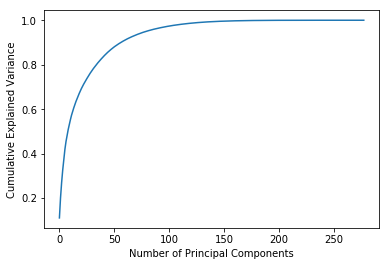

In [44]:
print('Cumulative sum of Variance')
plt.plot(cumsum)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance');

In [45]:
pca = PCA(n_components = 80)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)

#### 1. KNN Classification

In [46]:
param_grid = {'n_neighbors':[1,5,10,15,20]}

grid_search = GridSearchCV(knn, param_grid, cv = 5,scoring=recall_score, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'n_neighbors': 5}
Best score 0.601


In [47]:
knn_clf_pca = KNeighborsClassifier(n_neighbors=5).fit(X_train_reduced, y_train)
print('KNN classifcation')
print('Train score: {:.3f}'.format(knn_clf_pca.score(X_train_reduced, y_train)))
print('Test score: {:.3f}'.format(knn_clf_pca.score(X_test_reduced, y_test)))

KNN classifcation
Train score: 0.643
Test score: 0.555


#### 2. Logistics regression

In [48]:
param_grid = {'penalty':['l1','l2']}

grid_search = GridSearchCV(lreg, param_grid, cv = 5,scoring=recall_score, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'penalty': 'l1'}
Best score 0.713


In [49]:
lreg_clf_pca = LogisticRegression(penalty = 'l2').fit(X_train_reduced, y_train)

print('Logistic Regression')
print('Train score: {:.3f}'.format(lreg_clf_pca.score(X_train_reduced, y_train)))
print('Test score: {:.3f}'.format(lreg_clf_pca.score(X_test_reduced, y_test)))

Logistic Regression
Train score: 0.808
Test score: 0.536


#### 3. Linear Support Vector Machine

In [50]:
param_grid = {'C':[0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(lin, param_grid, cv = 5, scoring=recall_score,return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'C': 0.1}
Best score 0.716


In [51]:
lin_clf_pca = LinearSVC(C=0.1).fit(X_train_reduced, y_train)
print('Linear Supprt Vector Machine')
print('Train score: {:.3f}'.format(lin_clf_pca.score(X_train_reduced, y_train)))
print('Test score: {:.3f}'.format(lin_clf_pca.score(X_test_reduced,y_test)))

Linear Supprt Vector Machine
Train score: 0.799
Test score: 0.536


#### 4. Kerenilzed Support Vector Machine

In [52]:
param_grid = {'kernel':('rbf', 'sigmoid','linear'),
              'C':[0.01, 0.1, 1, 10],
              'gamma':[0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(svc, param_grid, cv = 5,scoring=recall_score, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score 0.716


In [53]:
sv_clf_pca = SVC(C=10, gamma=0.1,kernel='sigmoid').fit(X_train_reduced, y_train)
print('Support Vector Machine with kernels')
print('Train score: {:.3f}'.format(sv_clf_pca.score(X_train_reduced, y_train)))
print('Test score: {:.3f}'.format(sv_clf_pca.score(X_test_reduced,y_test)))

Support Vector Machine with kernels
Train score: 0.838
Test score: 0.555


#### 5. Decision Tree

In [54]:
param_grid = {'max_depth':range(1,20)}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring=recall_score,return_train_score = True)
grid_search.fit(X_train_reduced,y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 1}
Best score 0.576


In [55]:
dt_clf_pca = DecisionTreeClassifier(max_depth = 1).fit(X_train_reduced,y_train)
print('Decision Tree')
print('Train score: {:.3f}'.format(dt_clf_pca.score(X_train_reduced, y_train)))
print('Test score: {:.3f}'.format(dt_clf_pca.score(X_test_reduced, y_test)))

Decision Tree
Train score: 0.588
Test score: 0.473


#### 6. Random Forest

In [56]:
param_grid = {'max_depth':range(1,20)}

grid_search = GridSearchCV(rf, param_grid, cv= 5,scoring=recall_score, return_train_score = True)
grid_search.fit(X_train_reduced,y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 17}
Best score 0.591


In [57]:
rf_clf_pca = RandomForestClassifier(max_depth = 6).fit(X_train_reduced,y_train)
print('Random Forest')
print('Train score: {:.3f}'.format(rf_clf_pca.score(X_train_reduced, y_train)))
print('Test score: {:.3f}'.format(rf_clf_pca.score(X_test_reduced, y_test)))

Random Forest
Train score: 0.774
Test score: 0.509


#### 7. Voting Classifier

In [58]:
from sklearn.ensemble import VotingClassifier

hard_voting_clf = VotingClassifier(estimators=[('dt', dt_clf),('knn', knn_clf),('lr',lreg_clf)], voting = 'hard')
hard_voting_clf.fit(X_train_reduced, y_train)
print('Train score: {0:0.3f}'.format(hard_voting_clf.score(X_train_reduced, y_train)))
print('Test score: {0:0.3f}'.format(hard_voting_clf.score(X_test_reduced, y_test)))

Train score: 0.750
Test score: 0.536


In [59]:
from sklearn.ensemble import VotingClassifier

soft_voting_clf = VotingClassifier(estimators=[('dt', dt_clf),('knn', knn_clf),('lr',lreg_clf)], voting = 'soft')
soft_voting_clf.fit(X_train_reduced, y_train)
print('Train score: {0:0.2f}'.format(soft_voting_clf.score(X_train_reduced, y_train)))
print('Test score: {0:0.2f}'.format(soft_voting_clf.score(X_test_reduced, y_test)))

Train score: 0.78
Test score: 0.53


#### 8. Bagging 

In [60]:
X_total_reduced= pd.concat([pd.DataFrame(X_train_reduced),pd.DataFrame(X_test_reduced)])
y_total =pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test)])

In [61]:
from sklearn.ensemble import BaggingClassifier

for clf in (knn, lreg, lin, svc, dt, rf):
    bag_clf = BaggingClassifier(clf, n_estimators=100,bootstrap=True, n_jobs=-1, oob_score=True, random_state=10)
    bag_clf.fit(X_total_reduced, y_total)
    print(clf.__class__.__name__, bag_clf.oob_score_, '\n')

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsClassifier 0.0958904109589 

LogisticRegression 0.0570776255708 

LinearSVC 0.0296803652968 

SVC 0.100456621005 

DecisionTreeClassifier 0.0799086757991 

RandomForestClassifier 0.0981735159817 



#### 9. Boosting

In [62]:
from sklearn.ensemble import AdaBoostClassifier

for clf in (lreg, lin, svc, dt, rf):    
    ada_clf = AdaBoostClassifier(clf, n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=10)
    ada_clf.fit(X_train_reduced, y_train)
    print(clf.__class__.__name__, ada_clf.score(X_test_reduced,y_test),'\n')

LogisticRegression 0.427272727273 

LinearSVC 0.490909090909 

SVC 0.572727272727 

DecisionTreeClassifier 0.390909090909 

RandomForestClassifier 0.572727272727 



## 5. SUMMARY

In generally, baggind and boosting methods has a better prediction than single classfier. 
And PCA is a good way to reduce the demension of features and reduce the operating time.